# optimization of ensemble model using genetic algorithm

## considering logistc regression, decision tree and support vector machine

### load dataset(mnist data)

In [1]:
#Import the libraries.

import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

#data=pd.read_csv('mnist_train.csv')
data=pd.read_excel('ML data1.xlsx')
data.head()

,Participants,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Happiness score,Happiness class
0,1,0.650000,0.20,0.077778,0.350000,0.077778,0.077778,0.077778,0.077778,0.077778,...,0.20,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.162261,1
1,2,0.800000,0.80,0.800000,0.077778,0.650000,0.350000,0.200000,0.200000,0.800000,...,0.20,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.381992,2
2,3,0.650000,0.35,0.350000,0.200000,0.200000,0.650000,0.350000,0.650000,0.350000,...,0.65,0.800000,0.350000,0.350000,0.350000,0.200000,0.200000,0.200000,0.427586,2
3,4,0.077778,0.80,0.077778,0.200000,0.650000,0.077778,0.800000,0.200000,0.077778,...,0.20,0.200000,0.077778,0.077778,0.200000,0.077778,0.200000,0.200000,0.229310,1
4,5,0.650000,0.80,0.077778,0.200000,0.350000,0.077778,0.077778,0.800000,0.077778,...,0.20,0.650000,0.350000,0.200000,0.200000,0.200000,0.650000,0.922222,0.359962,2


In [2]:
data.tail()

,Participants,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Happiness score,Happiness class
169,170,0.650000,0.800000,0.077778,0.350000,0.650000,0.800000,0.350000,0.200000,0.200000,...,0.200000,0.077778,0.077778,0.200000,0.200000,0.200000,0.200000,0.200000,0.349617,2
170,171,0.922222,0.200000,0.200000,0.350000,0.650000,0.350000,0.350000,0.200000,0.200000,...,0.350000,0.077778,0.350000,0.350000,0.350000,0.650000,0.200000,0.077778,0.305364,2
171,172,0.077778,0.650000,0.077778,0.077778,0.077778,0.077778,0.077778,0.350000,0.077778,...,0.077778,0.800000,0.922222,0.077778,0.077778,0.077778,0.077778,0.077778,0.202682,1
172,173,0.650000,0.800000,0.350000,0.200000,0.650000,0.800000,0.350000,0.650000,0.200000,...,0.200000,0.800000,0.350000,0.200000,0.350000,0.077778,0.200000,0.077778,0.343487,2
173,174,0.077778,0.922222,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,...,0.077778,0.922222,0.922222,0.077778,0.077778,0.922222,0.077778,0.077778,0.206897,1


In [3]:
print("shape of data:", data.shape)

shape of data: (174, 32)


In [4]:
data.describe()

,Participants,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Happiness score,Happiness class
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,87.500000,0.454310,0.543742,0.223020,0.293135,0.463442,0.378640,0.414368,0.281450,0.196041,...,0.266507,0.498627,0.391794,0.233589,0.290549,0.298052,0.300415,0.229630,0.339749,1.689655
std,50.373604,0.306992,0.305857,0.203820,0.233781,0.296253,0.315021,0.276501,0.260004,0.205125,...,0.204705,0.314138,0.328143,0.210017,0.229958,0.262529,0.274915,0.254579,0.104540,0.632645
min,1.000000,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,...,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.144828,1.000000
25%,44.250000,0.200000,0.200000,0.077778,0.108333,0.200000,0.077778,0.200000,0.077778,0.077778,...,0.200000,0.200000,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.263027,1.000000
50%,87.500000,0.350000,0.650000,0.200000,0.200000,0.350000,0.200000,0.350000,0.200000,0.077778,...,0.200000,0.650000,0.200000,0.200000,0.200000,0.200000,0.200000,0.077778,0.332184,2.000000
75%,130.750000,0.762500,0.800000,0.312500,0.350000,0.650000,0.650000,0.650000,0.350000,0.200000,...,0.350000,0.800000,0.800000,0.350000,0.350000,0.350000,0.350000,0.200000,0.399330,2.000000
max,174.000000,0.922222,0.922222,0.922222,0.922222,0.922222,0.922222,0.922222,0.922222,0.922222,...,0.922222,0.922222,0.922222,0.922222,0.922222,0.922222,0.922222,0.922222,0.631992,3.000000


In [5]:
df_x=data.iloc[:,1:30]
df_y=data.iloc[:,31]

In [6]:
df_x.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
0,0.650000,0.20,0.077778,0.350000,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,...,0.077778,0.077778,0.20,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778,0.077778
1,0.800000,0.80,0.800000,0.077778,0.650000,0.350000,0.200000,0.200000,0.800000,0.350000,...,0.200000,0.200000,0.20,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
2,0.650000,0.35,0.350000,0.200000,0.200000,0.650000,0.350000,0.650000,0.350000,0.800000,...,0.650000,0.350000,0.65,0.800000,0.350000,0.350000,0.350000,0.200000,0.200000,0.200000
3,0.077778,0.80,0.077778,0.200000,0.650000,0.077778,0.800000,0.200000,0.077778,0.200000,...,0.200000,0.200000,0.20,0.200000,0.077778,0.077778,0.200000,0.077778,0.200000,0.200000
4,0.650000,0.80,0.077778,0.200000,0.350000,0.077778,0.077778,0.800000,0.077778,0.200000,...,0.350000,0.350000,0.20,0.650000,0.350000,0.200000,0.200000,0.200000,0.650000,0.922222


In [7]:
df_y.head()

0    1
1    2
2    2
3    1
4    2
Name: Happiness class, dtype: int64

In [8]:
df_y.unique()

array([1, 2, 3], dtype=int64)

## visualization of dataset

In [9]:
df=data.iloc[:, 1:30]
df_corr=df.corr()
df_corr

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29
Q1,1.000000,-0.196111,0.267819,-0.023812,0.276117,0.317948,0.091185,0.182122,0.263239,0.172915,...,0.228153,0.168134,0.167380,-0.005164,0.024187,0.134788,0.169620,0.180775,0.325120,0.082047
Q2,-0.196111,1.000000,-0.049664,0.181500,-0.008704,-0.187945,0.087526,0.102171,0.005165,-0.115412,...,0.010870,0.057346,0.036041,0.039891,-0.020430,0.082619,0.126872,-0.058954,-0.210104,0.139058
Q3,0.267819,-0.049664,1.000000,0.258626,-0.014373,0.137604,0.253523,0.362542,0.545104,0.337818,...,0.254409,0.430514,0.368291,0.065748,0.001811,0.376076,0.339300,0.155370,0.150247,0.136801
Q4,-0.023812,0.181500,0.258626,1.000000,-0.018103,-0.033252,0.295299,0.159249,0.191432,0.039133,...,0.152006,0.246739,0.182583,-0.007643,-0.133223,0.197776,0.197552,0.094733,-0.032777,0.121828
Q5,0.276117,-0.008704,-0.014373,-0.018103,1.000000,0.079870,0.145553,-0.074712,0.104538,0.040176,...,0.098266,0.076895,0.144927,0.117900,-0.081410,0.090217,0.087714,0.137397,0.344161,0.101692
Q6,0.317948,-0.187945,0.137604,-0.033252,0.079870,1.000000,0.018842,0.183891,0.237551,0.336983,...,0.121435,0.106279,0.124143,-0.049724,0.129541,0.131070,0.158426,0.141410,0.264710,0.088667
Q7,0.091185,0.087526,0.253523,0.295299,0.145553,0.018842,1.000000,0.262007,0.191864,0.134979,...,0.336371,0.269043,0.294815,0.073050,0.000375,0.185885,0.263892,0.147626,0.126810,0.059558
Q8,0.182122,0.102171,0.362542,0.159249,-0.074712,0.183891,0.262007,1.000000,0.328543,0.201970,...,0.349844,0.397153,0.256725,0.129791,0.215732,0.365503,0.430023,0.020861,0.204926,0.126516
Q9,0.263239,0.005165,0.545104,0.191432,0.104538,0.237551,0.191864,0.328543,1.000000,0.340332,...,0.187608,0.348721,0.434858,-0.001998,0.013514,0.335481,0.498045,0.079555,0.210629,0.090515
Q10,0.172915,-0.115412,0.337818,0.039133,0.040176,0.336983,0.134979,0.201970,0.340332,1.000000,...,0.149482,0.168154,0.215353,0.076987,0.021207,0.283839,0.249837,0.075100,0.176029,0.247910


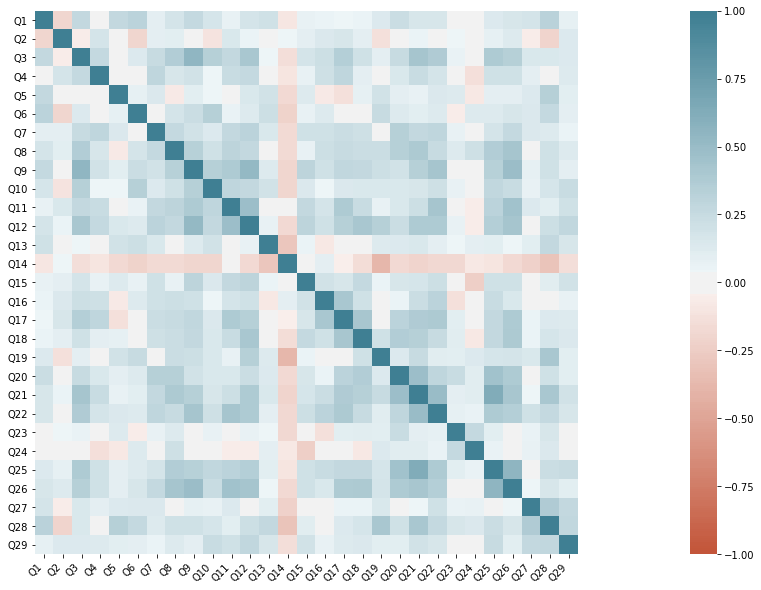

In [10]:
fig= plt.figure(figsize=(40,10))
ax = sns.heatmap(
    df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
dd=data.iloc[:, 30:32]
dd

,Happiness score,Happiness class
0,0.162261,1
1,0.381992,2
2,0.427586,2
3,0.229310,1
4,0.359962,2
...,...,...
169,0.349617,2
170,0.305364,2
171,0.202682,1
172,0.343487,2


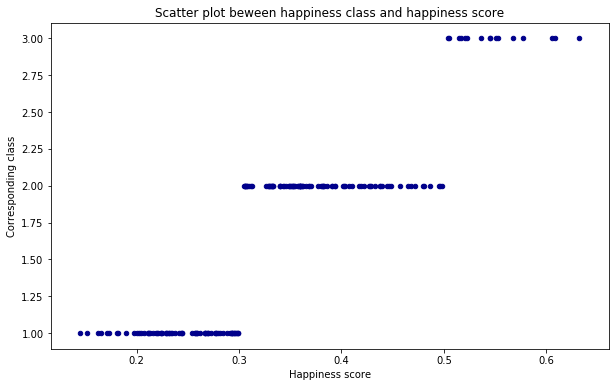

In [12]:
dd.plot(kind='scatter', x='Happiness score', y='Happiness class', figsize=(10, 6), color='darkblue')

plt.title('Scatter plot beween happiness class and happiness score')
plt.xlabel('Happiness score')
plt.ylabel('Corresponding class')

plt.show()

In [13]:
data['Happiness class'].value_counts()

2    88
1    70
3    16
Name: Happiness class, dtype: int64

In [14]:
import pandas as pd
data = {'Happiness class':  ['class 1', 'class 2', 'class 3'], 'total count': [70, 88, 16]}
d1 = pd.DataFrame (data, columns = ['Happiness class','total count'])

print (d1)

  Happiness class  total count
0         class 1           70
1         class 2           88
2         class 3           16


In [15]:
#d1['Happiness class']
d1['total count']

0    70
1    88
2    16
Name: total count, dtype: int64

Text(0.5, 1.0, 'total number of participants in each happiness class')

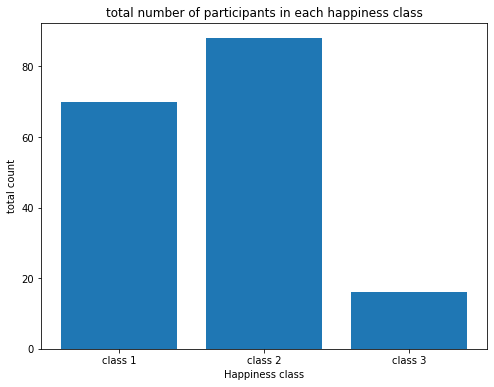

In [16]:
#d1.plot(kind='bar', figsize=(10,6))
plt.figure(figsize=(8,6))
plt.bar(d1['Happiness class'], d1['total count'], align='center')

plt.xlabel('Happiness class')
plt.ylabel('total count')
plt.title('total number of participants in each happiness class')

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [18]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (139, 29)
x_test shape: (35, 29)
y_train shape: (139,)
y_test shape: (35,)


### train using decision tree

In [19]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
y_pred=dt.predict(x_test)      ## for test dataset
y_pred1=dt.predict(x_train)    ## for train dataset

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix for test dataset:\n", conf_matrix)

confusion matrix for test dataset:
 [[11  1  0]
 [ 2 16  1]
 [ 0  2  2]]


In [22]:
print('Precision of test dataset: %.3f' % precision_score(y_test, y_pred, average='weighted'))
print('Precision of train dataset: %.3f' % precision_score(y_train, y_pred1, average='weighted'))

Precision of test dataset: 0.823
Precision of train dataset: 1.000


In [23]:
print('accuracy of test dataset: %.3f' % accuracy_score(y_test, y_pred))
print('accuracy of train dataset: %.3f' % accuracy_score(y_train, y_pred1))

accuracy of test dataset: 0.829
accuracy of train dataset: 1.000


In [24]:
f11=f1_score(y_test, y_pred, average='weighted')
print("for test dataset:", f11)

for test dataset: 0.8241632653061224


### train using logistic regression

In [25]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred=lr.predict(x_test)      ## for test dataset
y_pred1=lr.predict(x_train)    ## for train dataset

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix for test dataset:\n", conf_matrix)

confusion matrix for test dataset:
 [[12  0  0]
 [ 0 19  0]
 [ 0  3  1]]


In [28]:
print('Precision of test dataset: %.3f' % precision_score(y_test, y_pred, average='weighted'))
print('Precision of train dataset: %.3f' % precision_score(y_train, y_pred1, average='weighted'))

Precision of test dataset: 0.926
Precision of train dataset: 0.972


In [29]:
print('accuracy of test dataset: %.3f' % accuracy_score(y_test, y_pred))
print('accuracy of train dataset: %.3f' % accuracy_score(y_train, y_pred1))

accuracy of test dataset: 0.914
accuracy of train dataset: 0.971


In [30]:
f11=f1_score(y_test, y_pred, average='weighted')
print("for test dataset:", f11)

for test dataset: 0.8917073170731707


### train using support vector machine

In [31]:
svm=SVC(kernel='poly', degree=2)
#svm.fit(x_train.iloc[1:4000], y_train.iloc[1:4000])
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
y_red=svm.predict(x_test)     ## for test dataset
y_pred1=svm.predict(x_train)  ## for train dataset

In [33]:
conf_matrix = confusion_matrix(y_test, y_red)
print("confusion matrix for test dataset:\n", conf_matrix)

confusion matrix for test dataset:
 [[12  0  0]
 [ 0 19  0]
 [ 0  2  2]]


In [34]:
print('Precision of test dataset: %.3f' % precision_score(y_test, y_red, average='weighted'))
print('Precision of train dataset: %.3f' % precision_score(y_train, y_pred1, average='weighted'))

Precision of test dataset: 0.948
Precision of train dataset: 0.993


In [35]:
print('accuracy of test dataset: %.3f' % accuracy_score(y_test, y_red))
print('accuracy of train dataset: %.3f' % accuracy_score(y_train, y_pred1))

accuracy of test dataset: 0.943
accuracy of train dataset: 0.993


In [36]:
f11=f1_score(y_test, y_red, average='weighted')
print("for test dataset:", f11)

for test dataset: 0.9347619047619048


## using ensemble model using hard voting mechanism

In [37]:
#voting ensemble for multiple model
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr=LogisticRegression()
dt=DecisionTreeClassifier()
svm=SVC(kernel='poly', degree=2)

In [38]:
def model(weight):
    evc=VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('svm', svm)], voting='hard', weights=weight)
    #evc.fit(x_train.iloc[1:4000], y_train.iloc[1:4000])
    evc.fit(x_train, y_train)
    return evc

In [39]:
list=[5,9,23]
evc1=model(list)

In [40]:
pred=evc1.predict(x_test)

In [41]:
conf_matrix = confusion_matrix(y_test, y_red)
print("confusion matrix for test dataset:\n", conf_matrix)

confusion matrix for test dataset:
 [[12  0  0]
 [ 0 19  0]
 [ 0  2  2]]


In [42]:
print('Precision of test dataset: %.3f' % precision_score(y_test, y_pred, average='weighted'))

Precision of test dataset: 0.926


In [43]:
print('accuracy of test dataset: %.3f' % accuracy_score(y_test, y_pred))

accuracy of test dataset: 0.914


In [44]:
f11=f1_score(y_test, y_red, average='weighted')
print("for test dataset:", f11)

for test dataset: 0.9347619047619048


In [45]:
import os

## genetic algorithm for optimizing the weight of voting classifier

In [46]:
#initialize population
import random
p=0.8
best=p
fit=p
m=[]
n=[]

populations =([[random.randint(0,1) for x in range(6)] for i in range(4)])
#print(type(populations))
parents=[]
new_populations = []
print("Initial Populations:", populations)
print("Initial Accuracy:", p)

#fitness score calculation ............
def fitness_score() :
    global populations,best
    fit=p
    list1=[]
    for i in range(4) :
        chromosome_value=0
        
        for j in range(5,0,-1) :
            chromosome_value += populations[i][j]*(2**(5-j))
        #chromosome_value = -1*chromosome_value if populations[i][0]==1 else chromosome_value
        #print(chromosome_value)
        list1.append(chromosome_value)
        #fit_value.append(-(chromosome_value**2) + 5 )
        
    print("Weight Values:", list1)
    evc=model(list1[0:3])
    y_pred=evc.predict(x_test)
    #fit=evc.score(x_test, y_test)
    fit=accuracy_score(y_test, y_pred)
    m.append(fit)
    print("Calculated Accuracy:", fit)
    if fit>=best and fit<1:
        best=fit
    print("Best Accuracy:", best)
    n.append(best)
    #print(fit_value)
    #fit_value, populations = zip(*sorted(zip(fit_value, populations) , reverse = True))
    #best= fit_value[0]
    
#fitness_score()

#print(type(populations))
#selecting parents....
def selectparent():
    global parents
    #global populations , parents
    parents=populations[0:2]
    #print(type(parents))
    print("Selected Parents:", parents)
#selectparent()


def crossover() :
    global parents
    l1=()
    l2=()
    cross_point = random.randint(0,5)
    l1=tuple([(parents[0][0:cross_point +1] +parents[1][cross_point+1:6])])
    l2=tuple([(parents[1][0:cross_point +1] +parents[0][cross_point+1:6])])
    #parents=parents + tuple([(parents[0][0:cross_point +1] +parents[1][cross_point+1:6])])
    #parents =parents+ tuple([(parents[1][0:cross_point +1] +parents[0][cross_point+1:6])])
    parents=parents+[*l1]
    parents=parents+[*l2]
    
    print("Populations after crossover:", parents)
    

#crossover()

def mutation() :
    global populations, parents
    mute = random.randint(0,49)
    if mute == 20 :
        x=random.randint(0,3)
        y = random.randint(0,5)
        parents[x][y] = 1-parents[x][y]
    populations = parents
    print("Populations after mutation:", populations)
#mutation()

for i in range(100) :
    print("\n----------Generation ", i+1, "----------:")
    fitness_score()
    selectparent() 
    crossover()
    mutation()
#print("best score :")
#print(best)
print("sequence........")
print(populations[0])

#print(m)
#print(n)
    

Initial Populations: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 1, 1]]
Initial Accuracy: 0.8

----------Generation  1 ----------:
Weight Values: [2, 29, 17, 7]
Calculated Accuracy: 0.8
Best Accuracy: 0.8
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1]]
Populations after crossover: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1]]
Populations after mutation: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1]]

----------Generation  2 ----------:
Weight Values: [2, 29, 2, 29]
Calculated Accuracy: 0.8285714285714286
Best Accuracy: 0.8285714285714286
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1]]
Populations after crossover: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1], [0, 0, 0, 0, 1, 1], [0, 1, 1, 1, 0, 0]]
Populations after mutation: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1], [0, 0, 0, 0, 1, 1], [0, 1, 1, 1, 0, 0]]

----------Generation  3 ----------:
Weight Values: [2, 29, 3, 28]
C

Calculated Accuracy: 0.8285714285714286
Best Accuracy: 0.9428571428571428
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1]]
Populations after crossover: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1], [0, 0, 0, 1, 0, 1], [0, 1, 1, 0, 1, 0]]
Populations after mutation: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1], [0, 0, 0, 1, 0, 1], [0, 1, 1, 0, 1, 0]]

----------Generation  23 ----------:
Weight Values: [2, 29, 5, 26]
Calculated Accuracy: 0.8285714285714286
Best Accuracy: 0.9428571428571428
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1]]
Populations after crossover: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1], [0, 0, 1, 1, 0, 1], [0, 1, 0, 0, 1, 0]]
Populations after mutation: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1], [0, 0, 1, 1, 0, 1], [0, 1, 0, 0, 1, 0]]

----------Generation  24 ----------:
Weight Values: [2, 29, 13, 18]
Calculated Accuracy: 0.7714285714285715
Best Accuracy: 0.9428571428571428
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1]]
Populations after crossove

Calculated Accuracy: 0.9142857142857143
Best Accuracy: 0.9428571428571428
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]
Populations after crossover: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0]]
Populations after mutation: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0]]

----------Generation  44 ----------:
Weight Values: [2, 13, 3, 12]
Calculated Accuracy: 0.8
Best Accuracy: 0.9428571428571428
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]
Populations after crossover: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [0, 0, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0]]
Populations after mutation: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [0, 0, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0]]

----------Generation  45 ----------:
Weight Values: [2, 13, 5, 10]
Calculated Accuracy: 0.8571428571428571
Best Accuracy: 0.9428571428571428
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]
Populations after crossover: [[0, 0, 0, 0,

Calculated Accuracy: 0.9142857142857143
Best Accuracy: 0.9428571428571428
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]
Populations after crossover: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]
Populations after mutation: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]

----------Generation  64 ----------:
Weight Values: [2, 13, 2, 13]
Calculated Accuracy: 0.8
Best Accuracy: 0.9428571428571428
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]
Populations after crossover: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0]]
Populations after mutation: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0]]

----------Generation  65 ----------:
Weight Values: [2, 13, 13, 2]
Calculated Accuracy: 0.9142857142857143
Best Accuracy: 0.9428571428571428
Selected Parents: [[0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]
Populations after crossover: [[0, 0, 0, 0,

Calculated Accuracy: 0.8
Best Accuracy: 0.9428571428571428
Selected Parents: [[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]
Populations after crossover: [[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [1, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0]]
Populations after mutation: [[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [1, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0]]

----------Generation  86 ----------:
Weight Values: [2, 13, 13, 2]
Calculated Accuracy: 0.9142857142857143
Best Accuracy: 0.9428571428571428
Selected Parents: [[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]
Populations after crossover: [[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [1, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0]]
Populations after mutation: [[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], [1, 0, 1, 1, 0, 1], [0, 0, 0, 0, 1, 0]]

----------Generation  87 ----------:
Weight Values: [2, 13, 13, 2]
Calculated Accuracy: 0.9142857142857143
Best Accuracy: 0.9428571428571428
Selected Parents: [[1, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1]]
Populations after crossover: [[1, 0, 0, 0,

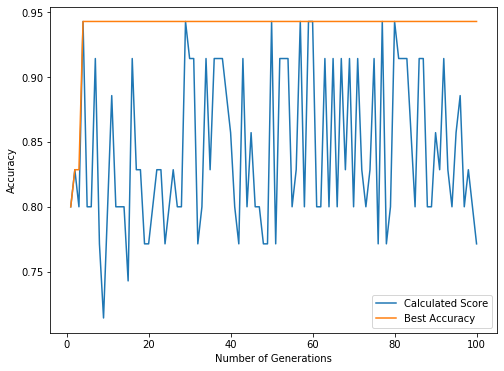

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
#print("Calculated Accuracy:", m)
#print("Best Accuracy:", n)
s=[]
for i in range(100):
    s.append(i+1)
    
plt.plot(s,m,label="Calculated Score")
plt.plot(s,n,label="Best Accuracy")
plt.xlabel("Number of Generations")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


In [48]:
print(m)
print(n)

[0.8, 0.8285714285714286, 0.8, 0.9428571428571428, 0.8, 0.8, 0.9142857142857143, 0.7714285714285715, 0.7142857142857143, 0.8, 0.8857142857142857, 0.8, 0.8, 0.8, 0.7428571428571429, 0.9142857142857143, 0.8285714285714286, 0.8285714285714286, 0.7714285714285715, 0.7714285714285715, 0.8, 0.8285714285714286, 0.8285714285714286, 0.7714285714285715, 0.8, 0.8285714285714286, 0.8, 0.8, 0.9428571428571428, 0.9142857142857143, 0.9142857142857143, 0.7714285714285715, 0.8, 0.9142857142857143, 0.8285714285714286, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.8857142857142857, 0.8571428571428571, 0.8, 0.7714285714285715, 0.9142857142857143, 0.8, 0.8571428571428571, 0.8, 0.8, 0.7714285714285715, 0.7714285714285715, 0.9428571428571428, 0.7714285714285715, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.8, 0.8285714285714286, 0.9428571428571428, 0.8, 0.9428571428571428, 0.9428571428571428, 0.8, 0.8, 0.9142857142857143, 0.8, 0.9142857142857143, 0.8, 0.9142857142857143, 0.82

In [49]:
listt=[33, 27, 33]
evc2=model(listt)

In [50]:
pp=evc2.predict(x_test)

In [51]:
print('accuracy of test dataset: %.3f' % accuracy_score(y_test, pp))

accuracy of test dataset: 0.914


In [52]:
print('Precision of test dataset: %.3f' % precision_score(y_test, pp, average='weighted'))

Precision of test dataset: 0.926


In [53]:
f11=f1_score(y_test, pp, average='weighted')
print("for test dataset:", f11)

for test dataset: 0.8917073170731707


In [54]:
conf_matrix = confusion_matrix(y_test, pp)
print("confusion matrix for test dataset:\n", conf_matrix)

confusion matrix for test dataset:
 [[12  0  0]
 [ 0 19  0]
 [ 0  3  1]]
